In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In C:\Users\adee\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\adee\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\adee\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\adee\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\adee\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [2]:
df_train = pd.read_csv("fashion-mnist_train.csv")
df_test = pd.read_csv("fashion-mnist_test.csv")

In [8]:
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# The 10 Classes 

0 - Tshirt

1 - Trouser

2 - Pullover

3 - Dress

4 - Coat

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag 

9 - Ankle Boot

# Visulaizing the Data

In [3]:
df_train.shape

(60000, 785)

In [4]:
df_test.shape

(10000, 785)

In [6]:
# Changing into matrix format since the data is given in numerical format , to view 
training = np.array(df_train,dtype="float32")
testing = np.array(df_test,dtype="float32")

In [7]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

4.0

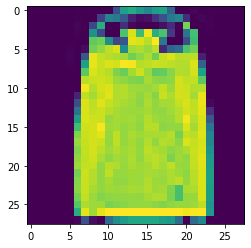

In [18]:
import random
i = random.randint(1,60000)
# reshape is used to change into 28X28 matrix
# 1: represents the slice of row
# label is used to say the category/class of the image i.e 10 classes
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

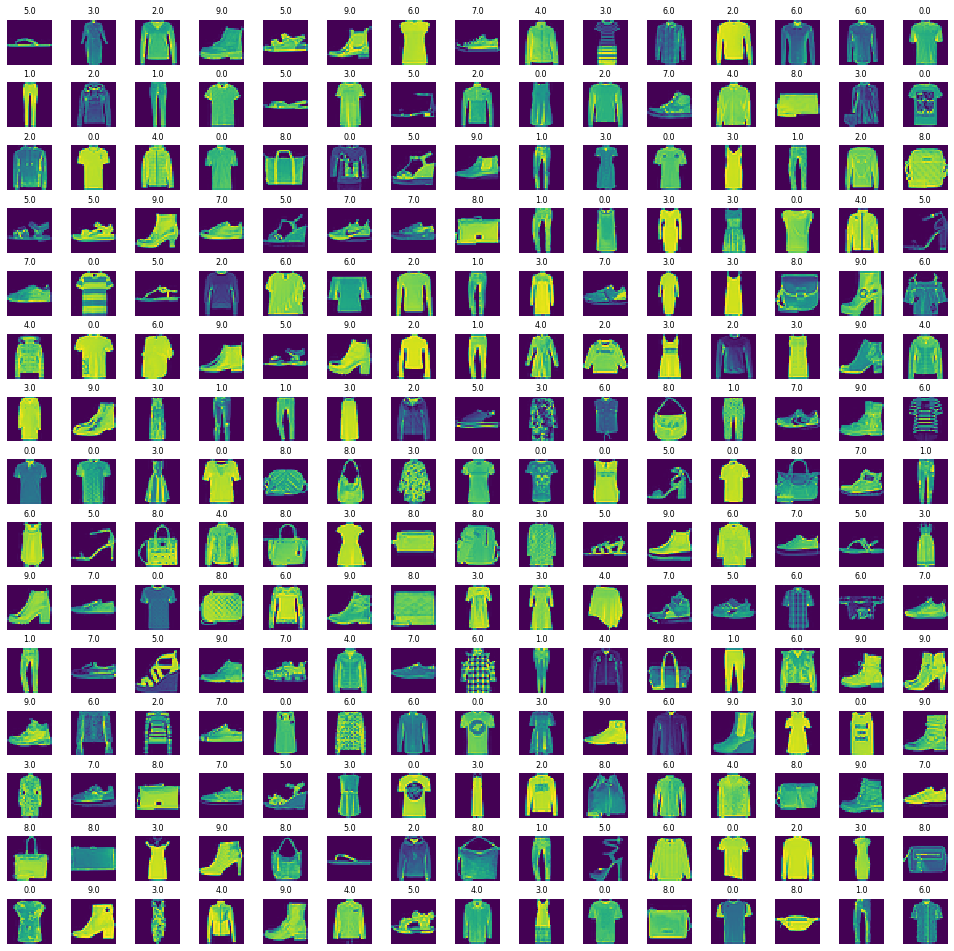

In [19]:
# Viewiing images in a grid format
# Defining the dimensions of the grid
W_grid = 15
L_grid = 15

# using subplots to plot multiple plots
fig, axes = plt.subplots(L_grid,W_grid,figsize=(17,17))

#flatening the matrix 15,15 into 255 array
axes = axes.ravel()

n_training = len(training)

for i in np.arange(0, W_grid * L_grid):#creating evenly spaces
    
    #select a random number
    index = np.random.randint(0, n_training)
    
    #reading and dsiplaying the image with a selected index
    axes[i].imshow( training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)


# Modelling

In [20]:
# Declaring the features
# 1: represents except 1st column
# dividing by 255 means to normalisation
X1 = training[:,1:]/255
y1 = training[:,0]

In [21]:
X2 = testing[:,1:]/255
y2 = testing[:,0]


In [39]:
# Changing the dimensions to 28x28 matrix format
X1 = X1.reshape(X1.shape[0], *(28,28,1))
X2 = X2.reshape(X2.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.3,random_state=23)

In [25]:
import keras

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [26]:
# to build model in a sequential format, use Sequential
cnn = Sequential()

In [27]:
# 32 represents kernel size
# 3,3 represents dimension
cnn.add(Conv2D(32,3,3, input_shape=(28,28,1), activation='relu'))

C:\Users\adee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [29]:
cnn.add(Flatten())

In [30]:
# these acts as as hidden layers
cnn.add(Dense(output_dim=32, activation='relu'))
cnn.add(Dense(output_dim=10, activation = 'sigmoid'))

C:\Users\adee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.
C:\Users\adee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [35]:
# using optimizer

cnn.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# to Solve this error - OperatorNotAllowedInGraphError: using a `tf.Tensor` as a Python `bool` is not allowed in Graph execution. Use Eager execution or decorate this function with @tf.function.
# solution 1 - check for spelling
# solution 2 - declare the values of loss and metrics seprately and apply in the function,
#               eg: my_loss = 'sparse_categorical_crossentropy', cnn.compile(loss=my_loss) 

In [36]:
epochs = 50 #number of iterations

In [41]:
cnn.fit(X_train, y_train, epochs=epochs, verbose=1, validation_data=(X_test,y_test))

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 23s 557us/step - loss: 0.5872 - accuracy: 0.7722 - val_loss: 0.3761 - val_accuracy: 0.8710
Epoch 2/50
42000/42000 [==============================] - 24s 565us/step - loss: 0.3566 - accuracy: 0.8758 - val_loss: 0.3234 - val_accuracy: 0.8866
Epoch 3/50
42000/42000 [==============================] - 24s 573us/step - loss: 0.3167 - accuracy: 0.8899 - val_loss: 0.3164 - val_accuracy: 0.8872
Epoch 4/50
42000/42000 [==============================] - 24s 581us/step - loss: 0.2909 - accuracy: 0.8971 - val_loss: 0.3003 - val_accuracy: 0.8929
Epoch 5/50
42000/42000 [==============================] - 21s 506us/step - loss: 0.2704 - accuracy: 0.9030 - val_loss: 0.2908 - val_accuracy: 0.8969
Epoch 6/50
42000/42000 [==============================] - 22s 513us/step - loss: 0.2528 - accuracy: 0.9094 - val_loss: 0.3003 - val_accuracy: 0.8914
Epoch 7/50
42000/42000 [==============================] 

# Evaluation

In [43]:
evaluation = cnn.evaluate(X_test,y_test)
print(evaluation[1])

18000/18000 [==============================] - 2s 90us/step
0.9038888812065125


In [44]:
y_preds = cnn.predict_classes(X_test)

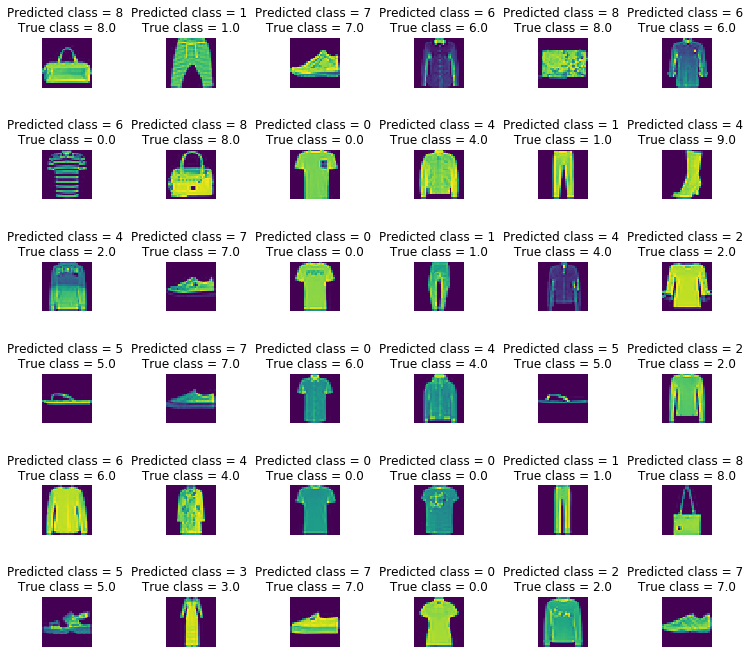

In [60]:
# plotting and viewing with the predicted class and true class
#0 - Tshirt
#1 - Trouser
#2 - Pullover
#3 - Dress
#4 - Coat
#5 - Sandal
#6 - Shirt
#7 - Sneaker
#8 - Bag
#9 - Ankle Boot

L = 6
W = 6

fig, ax = plt.subplots(L,W, figsize=(12,12))
ax = ax.ravel()

for i in np.arange(0, L * W):
    ax[i].imshow(X_test[i].reshape(28,28))
    ax[i].set_title("Predicted class = {} \n True class = {} ".format(y_preds[i],y_test[i]))
    ax[i].axis('off') #this removes the x-axis and y-axis values
    
plt.subplots_adjust(wspace=1.5)

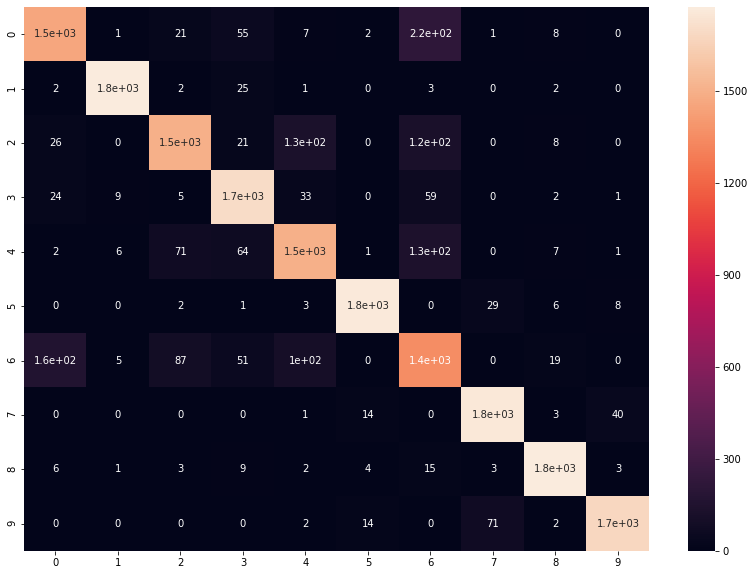

In [62]:
# using confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_preds)
plt.figure(figsize=(14,10))
ax = sns.heatmap(cm,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5);
#sum the diagonal elements to get total true values

In [65]:
# using Classification report
from sklearn.metrics import classification_report

classes = 10
target_names = ["Class {}".format (i) for i in range(classes)]
cls = classification_report(y_test,y_preds,target_names=target_names)

print(cls)

              precision    recall  f1-score   support

     Class 0       0.87      0.82      0.85      1773
     Class 1       0.99      0.98      0.98      1810
     Class 2       0.89      0.83      0.86      1801
     Class 3       0.88      0.93      0.90      1836
     Class 4       0.84      0.84      0.84      1788
     Class 5       0.98      0.97      0.98      1815
     Class 6       0.71      0.76      0.74      1776
     Class 7       0.94      0.97      0.96      1814
     Class 8       0.97      0.97      0.97      1816
     Class 9       0.97      0.95      0.96      1771

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.91      0.90      0.90     18000



# Improving the model

1. By incresing the kernel i.e 32 to 64